In [91]:
import pickle
import tweepy
import re #https://developers.google.com/edu/python/regular-expressions
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
G = nx.read_gpickle("first_network.gpickle")

In [3]:
G2 = nx.read_gpickle("second_network_w_weights.gpickle")

# The data (dictionary)

In [7]:
with open('tweet_dict.data', 'rb') as filehandle:
    tweet_dict = pickle.load(filehandle) 

{'SchaldemoseMEP': '@SchaldemoseMEP Selvfølgelig skynder vi os! Til dato har vi godkendt mere end 350 hjælpeordninger i EU - mere end 20 i DK. Tit på ganske få dage. Så sent som i fredags godkendte vi to danske ordninger, den ene er lønkompensation til virksomheder, der ikke kan holde åbent pga corona.',
 'oestergaard': '@oestergaard @radikale @sofiecn Ja, @sofiecn er god! Inddragende, principiel, dedikeret - og giver plads til tvivl og til at lære, så fælles løsninger kan findes. Hun er en leder, der både sætter retning og inddrager. God!',
 'vestager': 'RT @NATOpress: #NATO Secretary General @jensstoltenberg met the Executive Vice President of @EU_Commission 🇪🇺@vestager &amp; discussed the impo…',
 'simonkollerup': 'Great to participate in the debate in the Council for Ministers for Industry &amp; Internal Market @peteraltmaier. Focus on making Internal Market work, to have a common understanding of (open) strategic autonomy/sovereignty and recover together. #EU2020DE @simonkollerup 

In [11]:
pd_tweet_dict=pd.DataFrame.from_dict(tweet_dict)

In [31]:
pd_tweet_dict=pd_tweet_dict.transpose()

In [34]:
print("The number of tweet profiles who is found on twitter {}".format(pd_tweet_dict.shape[0]))

The number of tweet profiles who is found on twitter 640


In [35]:
print("The number of tweet profiles who is mentioned {}".format(pd_tweet_dict.shape[1]))

The number of tweet profiles who is mentioned 417


Each row is a politician. Which mentions others. Here is "vestager" chosed. And all that she mentions has a value:

In [39]:
pd_tweet_dict.loc[ 'vestager' , : ]

SchaldemoseMEP    @SchaldemoseMEP Selvfølgelig skynder vi os! Ti...
oestergaard       @oestergaard @radikale @sofiecn Ja, @sofiecn e...
vestager          RT @NATOpress: #NATO Secretary General @jensst...
simonkollerup     Great to participate in the debate in the Coun...
jesper_bedreby    Opening the upper secondary section of @Schola...
                                        ...                        
8464tage                                                        NaN
GlenMadsen                                                      NaN
Lindaf_dk                                                       NaN
PetterAstrup                                                    NaN
SimickMorten                                                    NaN
Name: vestager, Length: 417, dtype: object

Dropping nans to see who she mentions:

In [40]:
pd_tweet_dict.loc[ 'vestager' , : ].dropna()

SchaldemoseMEP     @SchaldemoseMEP Selvfølgelig skynder vi os! Ti...
oestergaard        @oestergaard @radikale @sofiecn Ja, @sofiecn e...
vestager           RT @NATOpress: #NATO Secretary General @jensst...
simonkollerup      Great to participate in the debate in the Coun...
jesper_bedreby     Opening the upper secondary section of @Schola...
RohlChristopher    RT @RohlChristopher: Prideweek starter i dag k...
Name: vestager, dtype: object

The tweet where ShaldemoseMEP is mentioned:

In [43]:
pd_tweet_dict.loc[ 'vestager' , : ].dropna().iloc[0]

'@SchaldemoseMEP Selvfølgelig skynder vi os! Til dato har vi godkendt mere end 350 hjælpeordninger i EU - mere end 20 i DK. Tit på ganske få dage. Så sent som i fredags godkendte vi to danske ordninger, den ene er lønkompensation til virksomheder, der ikke kan holde åbent pga corona.'

## Statistics on mentioned:

How many do each mention:

In [ ]:
pd_tweet_dict.count(axis=1).sort_values(ascending=False).head(10)

In [78]:
n_mentions=pd_tweet_dict.count(axis=1).sort_values(ascending=False)

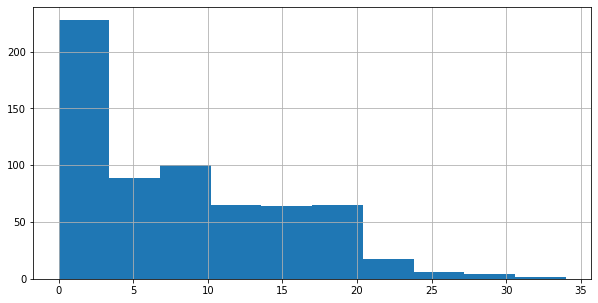

In [85]:
plt.figure(figsize=(10,5))
n_mentions.hist()
plt.show()

Who is mentioned the most:

In [76]:
pd_tweet_dict.count(axis=0).sort_values(ascending=False).head(10)

regeringDK         140
larsloekke         110
Heunicke            90
JakobEllemann       89
sophieloehde        76
PiaOlsen            70
Kristian_Jensen     69
DanJoergensen       64
mattiastesfaye      64
sofiecn             62
dtype: int64

In [80]:
n_is_mentioned=pd_tweet_dict.count(axis=0).sort_values(ascending=False)

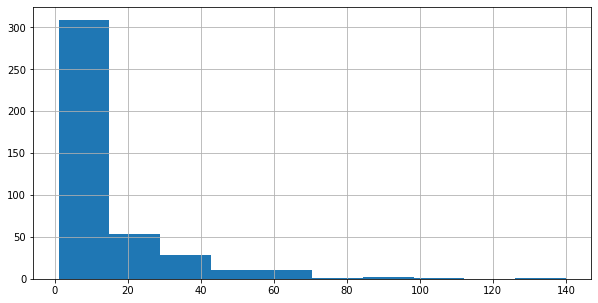

In [86]:
plt.figure(figsize=(10,5))
n_is_mentioned.hist()
plt.set_
plt.show()

# The network

In [87]:
G.number_of_nodes()

520

In [104]:
list_in=list(dict(G2.in_degree()).values()) # This is all of the nodes' degrees
list_out=list(dict(G2.out_degree()).values()) # This is all of the nodes' degrees

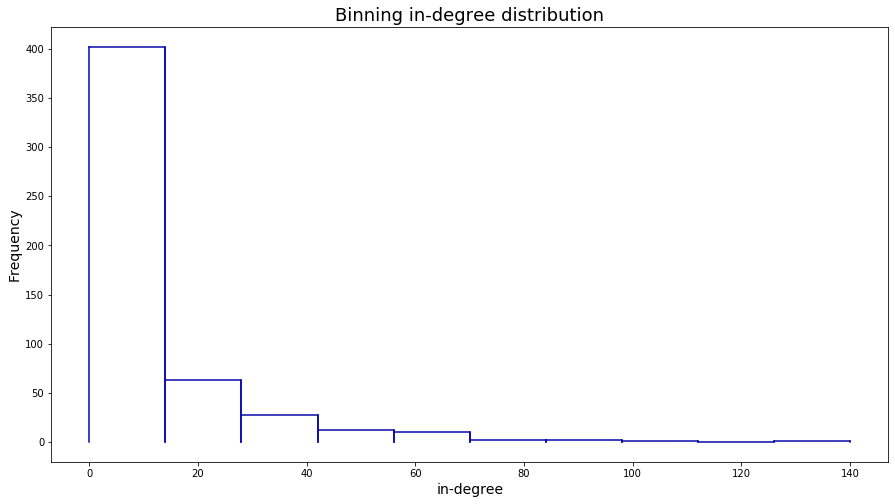

In [157]:
hist,bin_edges=np.histogram(list_in,bins=10)

rightboundary=bin_edges[1:]
leftboundary=bin_edges[:-1]
newlist_in=[] # list with leftboundary1,rightboundary1,leftboundary2,rightboundary2
newvalues_in=[] # histvalue1,histvalue1,histvalue2,histvalue2,....
for i in range(len(rightboundary)):
    newlist_in.append(leftboundary[i])
    newvalues_in.append(hist[i])
    newlist_in.append(rightboundary[i])
    newvalues_in.append(hist[i]) 
points_in=zip(newlist_in,newvalues_in)
 
plt.figure(figsize=(15,8))
plt.plot(newlist_in,newvalues_in,color='#0504aa')
for pt in points_in:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="#0504aa" )
 
plt.title('Binning in-degree distribution',fontsize=18)
plt.xlabel("in-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
#plt.axis([0, 140, 0, 500])
plt.show()

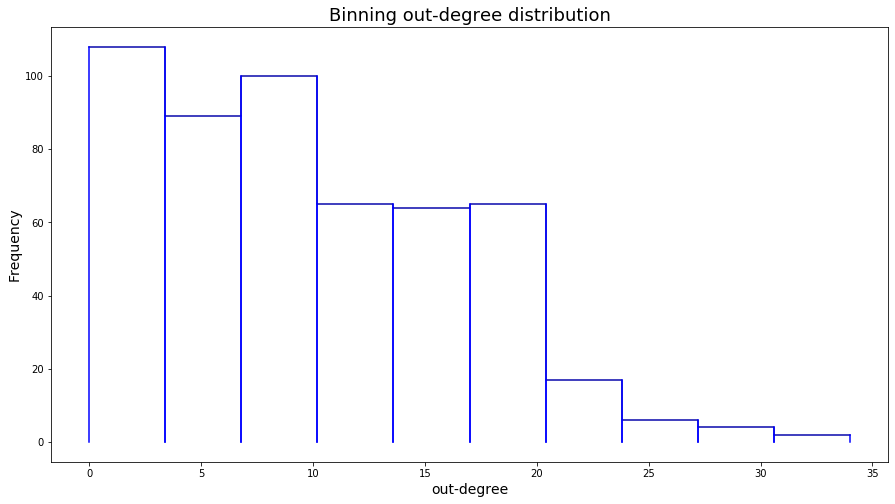

In [159]:
hist,bin_edges=np.histogram(list_out,bins=10)

rightboundary=bin_edges[1:]
leftboundary=bin_edges[:-1]
newlist_out=[] # list with leftboundary1,rightboundary1,leftboundary2,rightboundary2
newvalues_out=[] # histvalue1,histvalue1,histvalue2,histvalue2,....
for i in range(len(rightboundary)):
    newlist_out.append(leftboundary[i])
    newvalues_out.append(hist[i])
    newlist_out.append(rightboundary[i])
    newvalues_out.append(hist[i]) 
points_out=zip(newlist_out,newvalues_out)
 
plt.figure(figsize=(15,8))
plt.plot(newlist_out,newvalues_out,color='#0504aa')
for pt in points_out:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )
 
plt.title('Binning out-degree distribution',fontsize=18)
plt.xlabel("out-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
#plt.axis([0, 140, 0, 200])
plt.show()

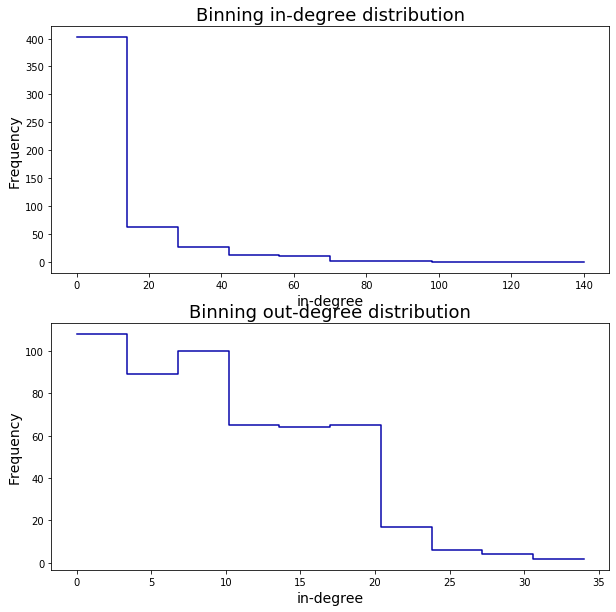

In [126]:

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(10,10))

##FIRST PLOT
ax1 = plt.subplot(211)
plt.plot(newlist_in,newvalues_in,color='#0504aa')
for pt in points_in:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="#0504aa" )
plt.title('Binning in-degree distribution',fontsize=18)
plt.xlabel("in-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

#SECOND PLOT
ax2 = plt.subplot(212)
plt.plot(newlist_out,newvalues_out,color='#0504aa')
for pt in points_out:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )
plt.title('Binning out-degree distribution',fontsize=18)
plt.xlabel("in-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

# some code to share both x axis


plt.show()

# Force atlas

In [140]:
G2_undirected=G2.to_undirected()

In [162]:
Gcc = sorted(nx.weakly_connected_components(G2), key=len, reverse=True)
giant_directed=G2.subgraph(Gcc[0])
giant = G2_undirected.subgraph(Gcc[0])

In [142]:
from fa2 import ForceAtlas2

In [143]:
from fa2 import ForceAtlas2

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs   #Want hubs inside other!
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)


positions = forceatlas2.forceatlas2_networkx_layout(giant, pos=None, iterations=2000)

100%|██████████| 2000/2000 [00:16<00:00, 122.85it/s]

BarnesHut Approximation  took  5.05  seconds
Repulsion forces  took  9.82  seconds
Gravitational forces  took  0.11  seconds
Attraction forces  took  0.24  seconds
AdjustSpeedAndApplyForces step  took  0.41  seconds


In [144]:
d = dict(giant.degree)

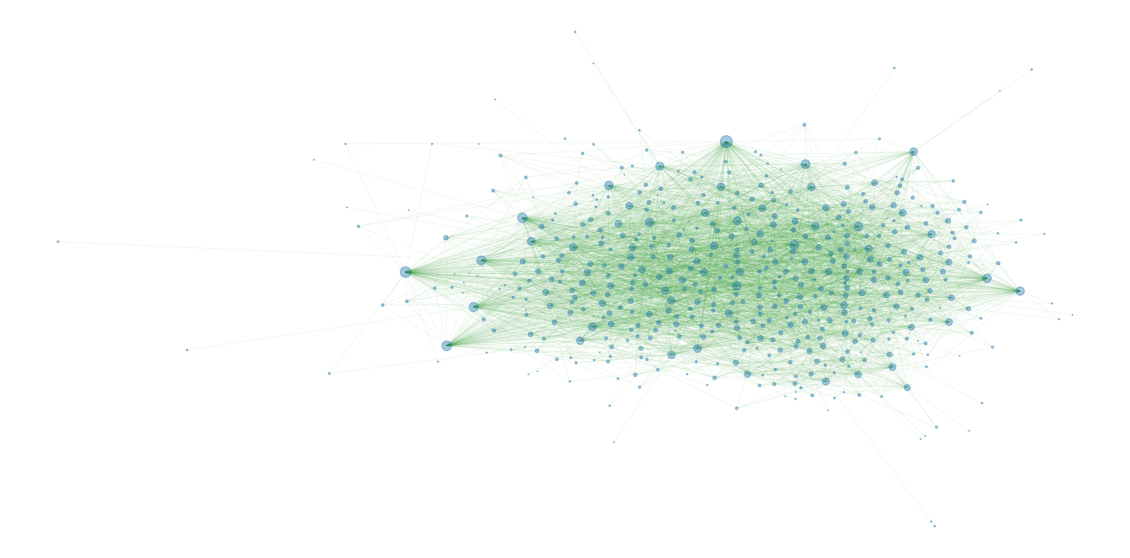

In [153]:
plt.figure(figsize=(20,10))
nx.draw_networkx_nodes(giant, positions, alpha=0.4,node_size=[v * 1 for v in d.values()])
nx.draw_networkx_edges(giant, positions, edge_color="green", alpha=0.05)
plt.axis('off')
plt.show()

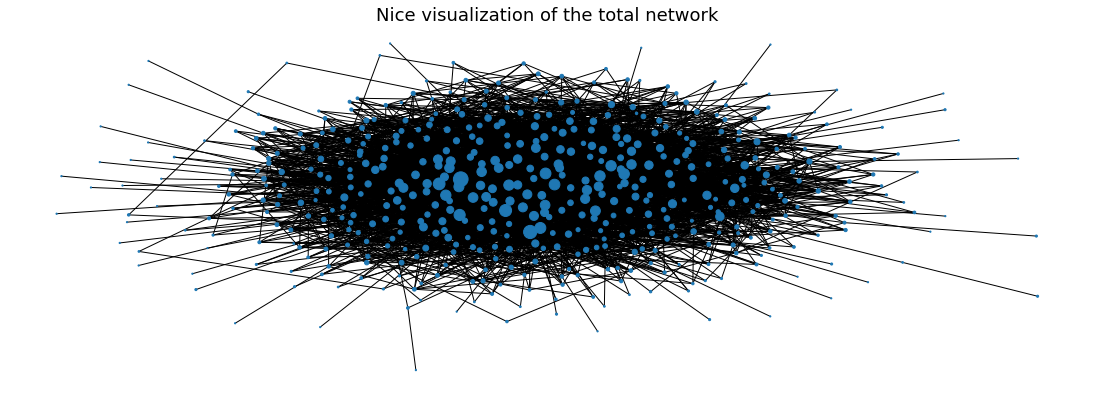

In [154]:
plt.figure(figsize=(15,5))
nx.draw_kamada_kawai(giant, node_size=[v * 1.5 for v in d.values()], width=1)

plt.title("Nice visualization of the total network",fontsize=18)
plt.show()

# Analysis on giant

In [163]:
giant_directed.number_of_nodes()

513

In [164]:
giant_directed.number_of_edges()

5085

In [165]:
list_in=list(dict(giant_directed.in_degree()).values()) # This is all of the nodes' degrees
list_out=list(dict(giant_directed.out_degree()).values()) # This is all of the nodes' degrees

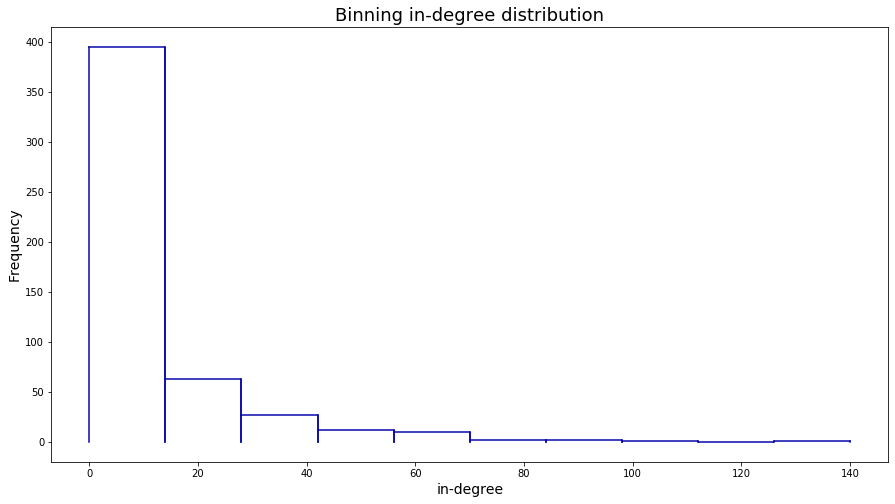

In [166]:
hist,bin_edges=np.histogram(list_in,bins=10)

rightboundary=bin_edges[1:]
leftboundary=bin_edges[:-1]
newlist_in=[] # list with leftboundary1,rightboundary1,leftboundary2,rightboundary2
newvalues_in=[] # histvalue1,histvalue1,histvalue2,histvalue2,....
for i in range(len(rightboundary)):
    newlist_in.append(leftboundary[i])
    newvalues_in.append(hist[i])
    newlist_in.append(rightboundary[i])
    newvalues_in.append(hist[i]) 
points_in=zip(newlist_in,newvalues_in)
 
plt.figure(figsize=(15,8))
plt.plot(newlist_in,newvalues_in,color='#0504aa')
for pt in points_in:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="#0504aa" )
 
plt.title('Binning in-degree distribution',fontsize=18)
plt.xlabel("in-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
#plt.axis([0, 140, 0, 500])
plt.show()

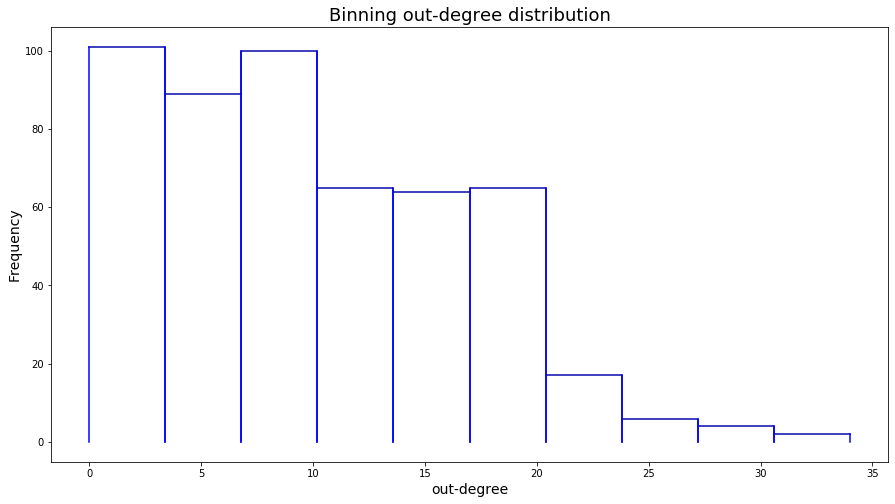

In [167]:
hist,bin_edges=np.histogram(list_out,bins=10)

rightboundary=bin_edges[1:]
leftboundary=bin_edges[:-1]
newlist_out=[] # list with leftboundary1,rightboundary1,leftboundary2,rightboundary2
newvalues_out=[] # histvalue1,histvalue1,histvalue2,histvalue2,....
for i in range(len(rightboundary)):
    newlist_out.append(leftboundary[i])
    newvalues_out.append(hist[i])
    newlist_out.append(rightboundary[i])
    newvalues_out.append(hist[i]) 
points_out=zip(newlist_out,newvalues_out)
 
plt.figure(figsize=(15,8))
plt.plot(newlist_out,newvalues_out,color='#0504aa')
for pt in points_out:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )
 
plt.title('Binning out-degree distribution',fontsize=18)
plt.xlabel("out-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
#plt.axis([0, 140, 0, 200])
plt.show()

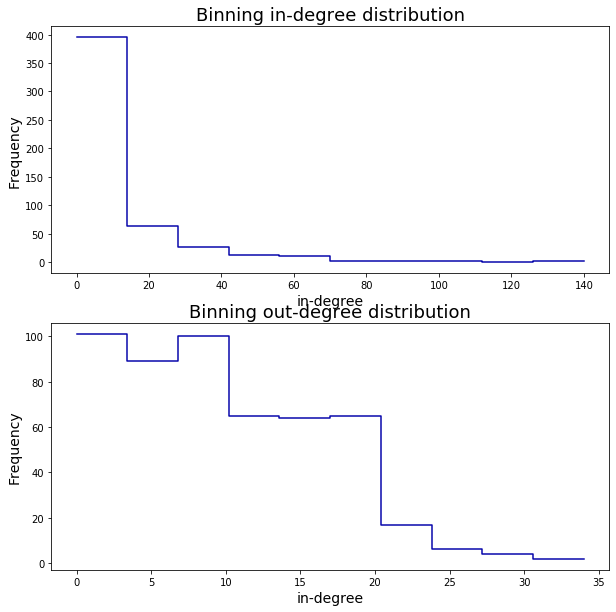

In [168]:

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(10,10))

##FIRST PLOT
ax1 = plt.subplot(211)
plt.plot(newlist_in,newvalues_in,color='#0504aa')
for pt in points_in:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="#0504aa" )
plt.title('Binning in-degree distribution',fontsize=18)
plt.xlabel("in-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

#SECOND PLOT
ax2 = plt.subplot(212)
plt.plot(newlist_out,newvalues_out,color='#0504aa')
for pt in points_out:
    plt.plot( [pt[0],pt[0]], [0,pt[1]],color="blue" )
plt.title('Binning out-degree distribution',fontsize=18)
plt.xlabel("in-degree",fontsize=14)
plt.ylabel("Frequency",fontsize=14)

# some code to share both x axis


plt.show()

In [176]:
pd_tweet_dict.count().sum()

5092

# To do / considerations

* Some posts do not tag other politicians, but just mention them in plain text. These kinds of non-tags of other persons have we not accounted for. They should possible be taken into account. (E.g. Kristian Thulesen Dahl write: "(...) Mette Frederiksen (...)" without a @. 

* Find out how to include re-tweet

* OBS: THe danish prime minister, Mette Frederiksen, does not have a twitter account.

* Should we include the parties own official twitter-profile as a "person"

* Make regex/"for name in" on all names (not just @) and all parties
